<a href="https://colab.research.google.com/github/SHASHIKATSHEGOKAR/Price-Prediction-/blob/main/Linear_regression_to_predict_future_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('dist_user.csv')
print(df)

    order_number order_status  ... item_cost                      name
0           7272   processing  ...    149.00                sai_shetty
1           7263    completed  ...    299.00             vaishnavi_m_r
2           7257    cancelled  ...    399.00              iyyappan_s_n
3           7254    completed  ...    250.00     shashvat_jayakrishnan
4           7251       failed  ...    149.00             rishav_mistry
5           6744    completed  ...    399.00            dhruvesh_patel
6           6722    completed  ...    379.05            swarali_vaidya
7           6565    completed  ...    141.55         yogeshvansh_gupta
8           6427    completed  ...    379.05             saurabh_kumar
9           4321    cancelled  ...    399.00         avinash_nukapeyyi
10          4320    completed  ...    359.10             manogna_matam
11          4240    completed  ...    199.00                sumit_bala
12          4172    cancelled  ...    399.00              nazia_kamboj
13    

In [ ]:
df.head()

,order_number,order_status,order_date,customer_note,company_(billing),address_1&2_(billing),city_(billing),state_code_(billing),postcode_(billing),country_code_(billing),email_(billing),phone_(billing),payment_method_title,cart_discount_amount,order_subtotal_amount,order_shipping_amount,order_total_amount,order_total_tax_amount,sku,item_#,item_name,quantity,item_cost,name
0,7272,processing,"september_19,_2021_02:12",i_hope_the_size_is_large.,NaN,"1-37_raghavendra_nagar_colony_uppal,_near_spar...",hyderabad,ts,500039,in,saicharanpulligadda@gmail.com,8328231217,credit_card/debit_card/netbanking,0.0,298,0,298.0,0,2606.0,1,lgbt_cloud_mask,1,149.0,sai_shetty
1,7263,completed,"august_17,_2021_21:28",NaN,NaN,"s-2,_244,_vaishnavi_lake_view_apartment,_8th_m...",bangalore,ka,560097,in,vaishnavimudliar99@gmail.com,8152083270,credit_card/debit_card/netbanking,0.0,299,0,299.0,0,305.0,1,safe_mask,1,299.0,vaishnavi_m_r
2,7257,cancelled,"august_14,_2021_22:15",NaN,NaN,"vibhu_pg_for_gents,_begur_road,_garebhavipalya",bangalore,ka,560068,in,iyyappan1112sn@gmail.com,8088399032,credit_card/debit_card/netbanking,0.0,399,0,399.0,0,4551.0,1,lets_get_better_together_tshirt,1,399.0,iyyappan_s_n
3,7254,completed,"august_13,_2021_22:19",hoodie_size_=_xxl/2xl,NaN,"a-303,_eves_garden_society,_baner_road,_baner",pune,mh,411045,in,kumarshyam2499@gmail.com,8667780342,credit_card/debit_card/netbanking,0.0,1397,0,1397.0,0,7095.0,1,small_flag,1,250.0,shashvat_jayakrishnan
4,7251,failed,"august_10,_2021_02:06",NaN,NaN,"15/3_sanat_villa,_r.n._tagore_road,_nabapally,...",kolkata,wb,700063,in,rishavmistry@gmail.com,8334967083,credit_card/debit_card/netbanking,0.0,149,0,149.0,0,2666.0,1,lgbt_drink_pride_mask,1,149.0,rishav_mistry


In [ ]:
print(df.describe())

       order_number  postcode_(billing)  ...   quantity   item_cost
count     56.000000           56.000000  ...  56.000000   56.000000
mean    3965.125000       462022.107143  ...   1.017857  285.566964
std     1435.480041       223349.183482  ...   0.133631  134.874926
min     1203.000000       110001.000000  ...   1.000000   99.000000
25%     3113.750000       345903.250000  ...   1.000000  149.000000
50%     3152.500000       457904.000000  ...   1.000000  299.000000
75%     4067.250000       696274.000000  ...   1.000000  399.000000
max     7272.000000       841226.000000  ...   2.000000  800.000000

[8 rows x 11 columns]


In [ ]:
df.shape

(56, 24)

In [ ]:
df['order_total_amount'].describe()

count      56.000000
mean      403.533929
std       293.294943
min        99.000000
25%       198.750000
50%       399.000000
75%       404.750000
max      1397.000000
Name: order_total_amount, dtype: float64

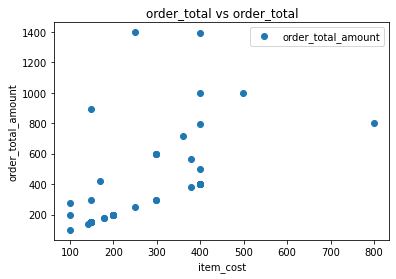

In [ ]:
df.plot(x='item_cost', y='order_total_amount', style='o')
plt.title('order_total vs order_total')
plt.xlabel('item_cost')
plt.ylabel('order_total_amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


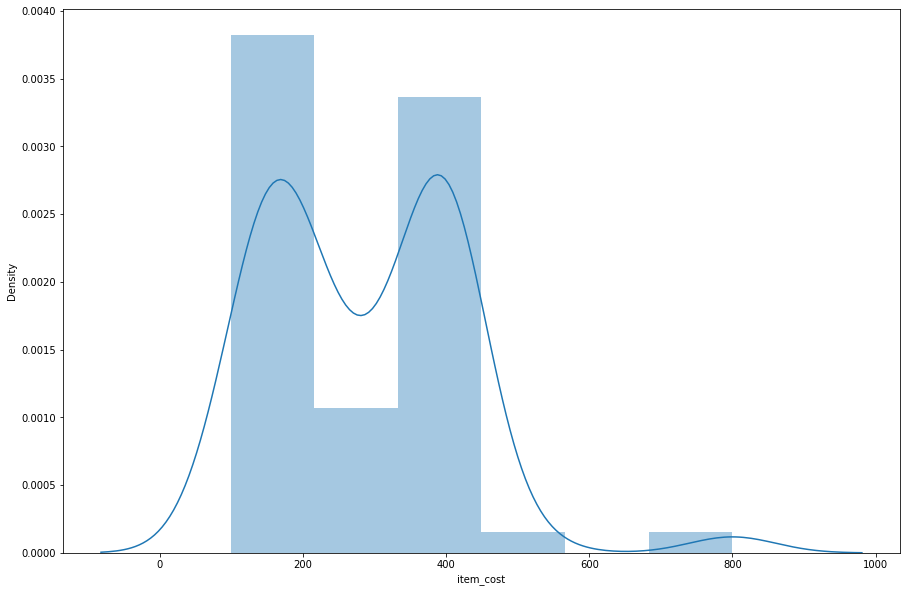

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['item_cost'])

In [ ]:
X = df['item_cost'].values.reshape(-1,1)
y = df['order_total_amount'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[77.60320827]
[[1.20110413]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,149.0,256.567723
1,419.0,280.589806
2,800.0,1038.486511
3,179.0,292.600847
4,199.0,316.622930
5,399.0,556.843756
6,250.0,377.879240
7,199.0,316.622930
8,149.0,256.567723
9,149.0,256.567723
